In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('flights.csv')
print(df.head())

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    object        
 2   passengers  144 non-null    int64         
 3   date        144 non-null    datetime64[ns]
 4   moving_avg  139 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.8+ KB
None


In [ ]:
print(df.isnull().sum()) #check for missing values

year          0
month         0
passengers    0
date          0
moving_avg    5
dtype: int64


In [12]:
#check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [13]:
#summary statistics
print(df.describe())

              year  passengers                 date  moving_avg
count   144.000000  144.000000                  144  139.000000
mean   1954.500000  280.298611  1954-12-16 05:00:00  280.151079
min    1949.000000  104.000000  1949-01-01 00:00:00  119.666667
25%    1951.750000  180.000000  1951-12-24 06:00:00  182.416667
50%    1954.500000  265.500000  1954-12-16 12:00:00  259.166667
75%    1957.250000  360.500000  1957-12-08 18:00:00  362.416667
max    1960.000000  622.000000  1960-12-01 00:00:00  534.000000
std       3.464102  119.966317                  NaN  111.943814


In [14]:
#total passengers per year
passengers_per_year=df.groupby('year')['passengers'].sum()
print('\n Total passengers per year:')
print(passengers_per_year)



 Total passengers per year:
year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64


In [16]:
passengers_per_month=df.groupby('month')['passengers'].mean().sort_values(ascending=False)
print('Average passengers per month:')
print(passengers_per_month)


Average passengers per month:
month
July         351.333333
August       351.083333
June         311.666667
September    302.416667
May          271.833333
March        270.166667
April        267.083333
October      266.583333
December     261.833333
January      241.750000
February     235.000000
November     232.833333
Name: passengers, dtype: float64


# Passengers over time

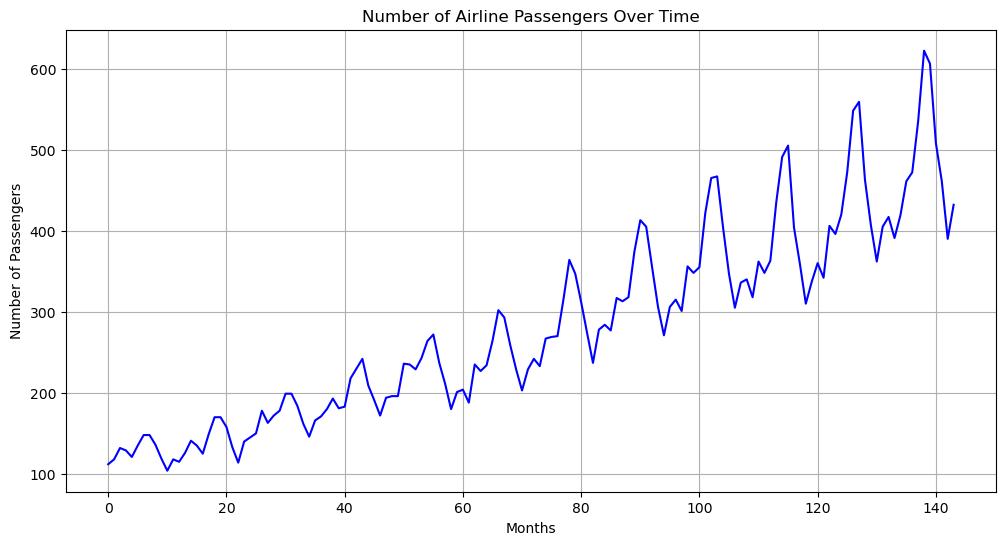

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['passengers'],color='blue')
plt.title('Number of Airline Passengers Over Time')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()



# Yearly Trend

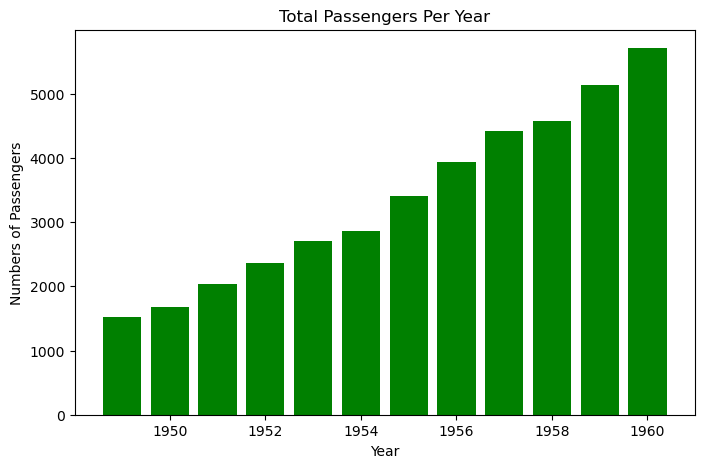

In [23]:
plt.figure(figsize=(8,5))
plt.bar(passengers_per_year.index,passengers_per_year.values,color='green')
plt.title('Total Passengers Per Year')
plt.xlabel('Year')
plt.ylabel('Numbers of Passengers')
plt.show()

# Monthly Trend 

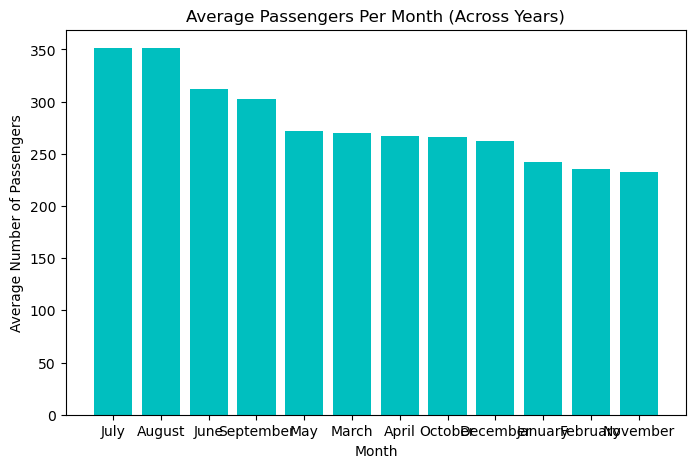

In [24]:
plt.figure(figsize=(8,5))
plt.bar(passengers_per_month.index, passengers_per_month.values,color='c')
plt.title('Average Passengers Per Month (Across Years)')
plt.xlabel('Month')
plt.ylabel('Average Number of Passengers')
plt.show()

# Moving Average


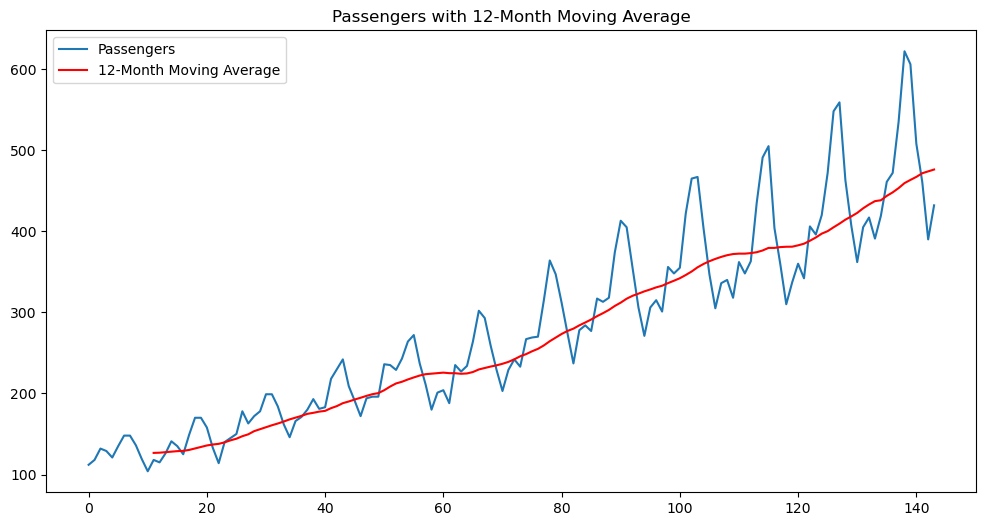

In [25]:
df['moving_average'] = df['passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['passengers'], label='Passengers')
plt.plot(df['moving_average'], label='12-Month Moving Average', color='red')
plt.title('Passengers with 12-Month Moving Average')
plt.legend()
plt.show()
